In [1]:
import sympy as sp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
e, t, w1, w2 = sp.symbols('e, t, w1, w2')
x0, x1, x2 = sp.symbols('x0, x1, x2')
d2x0, d2x1, d2x2 = sp.symbols('\ddot{x}_0, \ddot{x}_1, \ddot{x}_2')

In [3]:
x = x0 + e * x1 + e**2 * x2
d2x = d2x0 + e * d2x1 + e**2 * d2x2
w = 1 + e * w1 + e**2 * w2

In [4]:
ex1 = (w**2 * d2x + x - e * x**3).expand()

In [5]:
eq0 = ex1.subs(e,0)
eq0

\ddot{x}_0 + x0

In [6]:
eq1 = ex1.coeff(e)
eq1

2*\ddot{x}_0*w1 + \ddot{x}_1 - x0**3 + x1

In [7]:
eq2 = ex1.coeff(e**2)
eq2

\ddot{x}_0*w1**2 + 2*\ddot{x}_0*w2 + 2*\ddot{x}_1*w1 + \ddot{x}_2 - 3*x0**2*x1 + x2

## Compare numerical solution with analytical approximation

Equation
\begin{equation}
\ddot{x}+\sin x=0 \qquad
x(0) = x_0 \quad
\dot{x}(0) = 0
\end{equation}
introducing new variable
\begin{equation}
z_1 = x \quad
z_2 = \dot{x}
\end{equation}
get the system of 1st order equation for numerical procedure
\begin{equation}
\frac{d}{dt}
\begin{pmatrix}
z_1 \\ z_2
\end{pmatrix}=
\begin{pmatrix}
z_2 \\
-\sin z_1
\end{pmatrix}
\end{equation}

In [8]:
def duffing_eqs(z, t):
    return [ z[1], -np.sin(z[0]) ]

Numerical solution

In [9]:
x1 = 0.1  # rad
x2 = np.pi/2
x3 = 0.9*np.pi

t = np.linspace(0, 5*2*np.pi, 100)

sol1 = odeint(duffing_eqs, [x1, 0], t)
sol2 = odeint(duffing_eqs, [x2, 0], t)
sol3 = odeint(duffing_eqs, [x3, 0], t)

In [10]:
def plot_duffing(t, sol, fcn, *, title):
    plt.plot(t, sol, t, fcn)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.legend(['numerical', 'analytic'])
    plt.title(title)

Approximation to analytival solution
$$x(t)\approx x_0\cdot\cos\left(\left(1-\frac{1}{16}x_0^2\right)t\right)$$

In [11]:
def approx_sol(t, x0):
    return x0 * np.cos((1-x0**2/16)*t)

Solution for small amplitude $x_0 \ll \pi$

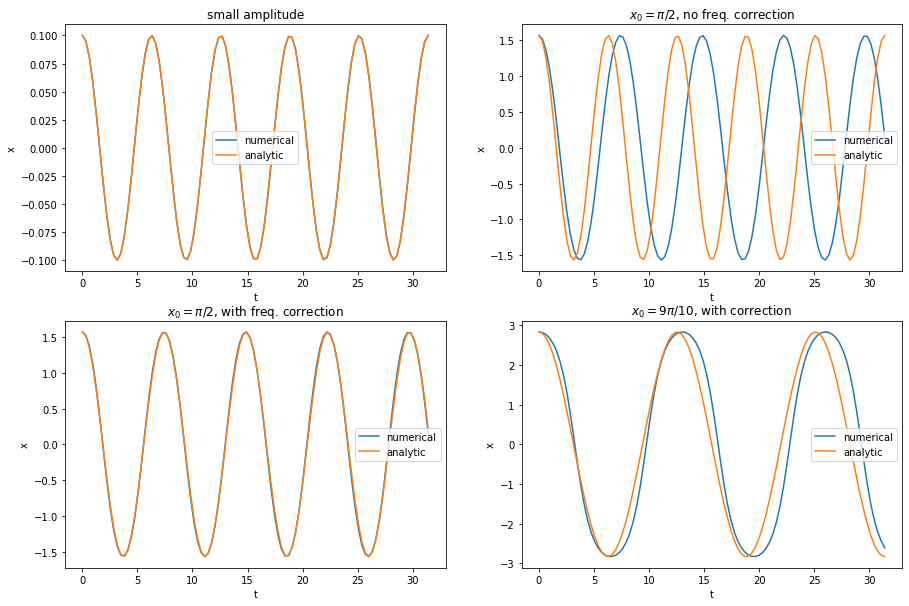

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plot_duffing(t, sol1[:,0], x1*np.cos(t),
             title='small amplitude')
plt.subplot(2,2,2)
plot_duffing(t, sol2[:,0], x2*np.cos(t),
             title='$x_0=\pi/2$, no freq. correction')
plt.subplot(2,2,3)
plot_duffing(t, sol2[:,0], approx_sol(t, x2),
             title='$x_0=\pi/2$, with freq. correction')
plt.subplot(2,2,4)
plot_duffing(t, sol3[:,0], approx_sol(t, x3),
             title='$x_0=9\pi/10$, with correction')
plt.show()